In [1]:
""" import useful functions """

import matplotlib.pyplot as plt 
import pyccl as ccl
import numpy as np
import scipy
%matplotlib inline

In [2]:
""" define functions """

# gives X(z) as defined in (8) Wang and Mota (note - k vanishes when calculating X)

def X(z, cosmo, alpha_tilde):
    
    H0 , Omega_c , Omega_b , Omega_k , Omega_r = cosmo
    Omega_m = Omega_c + Omega_b
    Omega_lambda = 1 - Omega_m - Omega_r - Omega_k
    
    return 1 + 4 * alpha_tilde * (Omega_m * (1 + z) ** 3 + Omega_r * (1 + z)** 4 + Omega_k * (1 + z) ** 2 + Omega_lambda)

# gives E(z) = H(z) / H0

def E(z , cosmo , alpha_tilde):
    
    H0 , Omega_c , Omega_b , Omega_k , Omega_r = cosmo
    Omega_m = Omega_c + Omega_b
    Omega_lambda = 1 - Omega_m - Omega_r - Omega_k
    

    if alpha_tilde == 0:
        ans = np.sqrt(Omega_m * (1 + z) ** 3 + Omega_r * (1 + z) ** 4 + Omega_k * (1 + z) ** 2 + Omega_lambda)
    else:
        
        # Wang and Mota
        ans = np.sqrt((np.sqrt(X(z , cosmo , alpha_tilde)) - 1)/(2 * alpha_tilde))
    
    return ans
    
# gives dH/dz

def dHdz(z , cosmo , alpha_tilde):
    
    H0 , Omega_c , Omega_b , Omega_k , Omega_r = cosmo
    Omega_m = Omega_c + Omega_b
    
    # Wang and Mota
    dHdz = H0 * ((3 * Omega_m * (1 + z) ** 2) + (4 * Omega_r * (1 + z) ** 3) + (2 * Omega_k * (1 + z)))/ \
    (2 * E(z , cosmo , alpha_tilde) * np.sqrt(X(z , cosmo , alpha_tilde)))
    
    return dHdz

# gives rho_cdm / rho_DE as a function of z

def rho_cdm_frac_rho_de(z , cosmo , alpha_tilde):
    
    H0 , Omega_c , Omega_b , Omega_k , Omega_r = cosmo
    Omega_m = Omega_c + Omega_b
    Omega_lambda = 1 - Omega_m - Omega_r - Omega_k
    a = 1 / (1 + z)
    H = H0 * E(z, cosmo, alpha_tilde)
    alpha = alpha_tilde / (2 * H0 ** 2)
    
    # Wang and Mota
    frac = 3 * (H0 ** 2) * Omega_c * ((1 + z) ** 3) / ((3 * Omega_lambda * H0 ** 2) - (6 * alpha_tilde * H ** 4))
    
    return frac

# find w = P / pho for dark energy   -- Set to WandM

def omega_de(z , cosmo , alpha_tilde):
    
    H0 , Omega_c , Omega_b , Omega_k , Omega_r = cosmo
    Omega_m = Omega_c + Omega_b
    Omega_lambda = 1 - Omega_m - Omega_r - Omega_k 
    Lambda = Omega_lambda * 3 * H0 ** 2
    alpha = alpha_tilde / (2 * H0 ** 2)
    
    a = 1 / (1 + z)
    H = H0 * E(z, cosmo, alpha_tilde)
    
    # Wang and Mota
    ans = - 1 + (8 * alpha_tilde * (1 + z) * (H ** 2) * dHdz(z , cosmo , alpha_tilde) / ((6 * alpha_tilde * H ** 4) - Lambda))
    
    #print(Omega_lambda)
    return ans

alpha_tilde/alpha =  9.085520000000001e-05


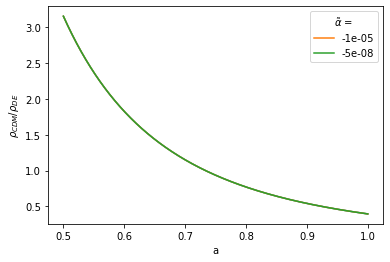

In [10]:
""" Plot FIG 1 Wang and Mota"""

# gives cosmological parameters except alpha

H0 = 6.74*1e-3
cosmo = [H0 , 0.27 , 0.045 , 0 , 9.2e-5]                      #  H0 , Omega_c , Omega_b , Omega_k , Omega_r 
print("alpha_tilde/alpha = ",(2 * H0 ** 2))

a = np.linspace( 0.5 , 1 , int(1e3))

plt.plot(a, rho_cdm_frac_rho_de((1/a) - 1, cosmo , 0))
alpha_tilde = -1e-5
plt.plot(a, rho_cdm_frac_rho_de((1/a) - 1, cosmo , alpha_tilde), label = alpha_tilde)
alpha_tilde = -5e-8
plt.plot(a, rho_cdm_frac_rho_de((1/a) - 1, cosmo , alpha_tilde), label = alpha_tilde)


#plt.xlim(0.55,1)
#plt.ylim(0,3)
plt.xlabel("a")
plt.ylabel(r"$ \rho_{CDM} / \rho_{DE} $")
plt.legend(title = r"$ \~\alpha $ = ")
plt.show()

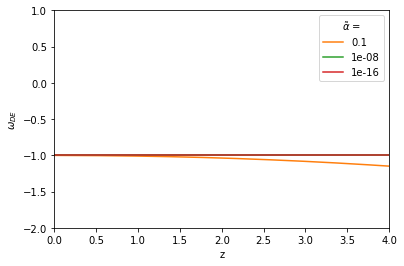

In [11]:
""" Plot FIG 2 Wang and Mota"""

z = np.linspace(0 , 4 , int(1e3))

plt.plot(z , omega_de(z , cosmo , 0))

alpha_tilde = 1e-1
plt.plot(z , omega_de(z , cosmo , alpha_tilde), label = alpha_tilde)
alpha_tilde = 1e-8
plt.plot(z , omega_de(z , cosmo , alpha_tilde), label = alpha_tilde)
alpha_tilde = 1e-16
plt.plot(z , omega_de(z , cosmo , alpha_tilde), label = alpha_tilde)

plt.xlim(0,4)
plt.ylim(-2,1)
plt.xlabel("z")
plt.ylabel(r"$ \omega_{DE} $")
plt.legend(title = r"$ \~\alpha $ = ")
plt.show()

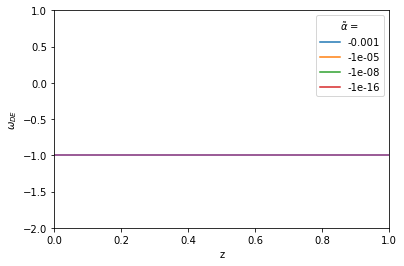

In [12]:
""" Plot FIG 2 Wang and Mota"""

z = np.linspace(0 , 1 , int(1e3))

alpha_tilde = -1e-3
plt.plot(z , omega_de(z , cosmo , alpha_tilde), label = alpha_tilde)
alpha_tilde = -1e-5
plt.plot(z , omega_de(z , cosmo , alpha_tilde), label = alpha_tilde)
alpha_tilde = -1e-8
plt.plot(z , omega_de(z , cosmo , alpha_tilde), label = alpha_tilde)
alpha_tilde = -1e-16
plt.plot(z , omega_de(z , cosmo , alpha_tilde), label = alpha_tilde)

plt.plot(z , omega_de(z , cosmo , 0))

plt.xlim(0,1)
plt.ylim(-2,1)
plt.xlabel("z")
plt.ylabel(r"$ \omega_{DE} $")
plt.legend(title = r"$ \~\alpha $ = ")
plt.show()